# Salary prediction model based on years of experiments

## 01. data preprocessing

In [26]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Importing data and show some information about the data
data = pd.read_csv('./Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [30]:
# Spliting data into inputs(x) and outputs(y)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [31]:
# Visualize the data with plotly library
import plotly.express as px

core_data_fig = px.scatter(data, x="YearsExperience", y="Salary", height=400)
core_data_fig.show()

In [32]:
# Spliting data into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 02. Training the SimpleLinearRegression on the training set

In [33]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

## 03. Predicting the test & train set results

In [34]:
y_pred = lrm.predict(x_test)
y_pred.shape
y_pred_train = lrm.predict(x_train)

In [35]:
x_test_1d = x_test.reshape(-1)
x_train_1d = x_train.reshape(-1)

## 04. Visualising the data prediction

In [36]:
# Visualising whith plotly
import plotly.graph_objects as go
pred_fig =  go.Figure()
pred_fig.add_trace(go.Scatter(x=x_train_1d, y=y_pred_train, mode='markers+lines',
                              name="Model prediction on the train set"))
pred_fig.add_trace(go.Scatter(x=x_test_1d, y=y_pred, mode='markers+lines',
                              name="Model prediction on the test set"))
pred_fig.add_trace(go.Scatter(x=x_test_1d, y=y_test, mode='markers', name="Actual test set values"))
pred_fig.add_trace(go.Scatter(x=x_train_1d, y=y_train, mode='markers', name="Actual train set values"))
pred_fig.show()

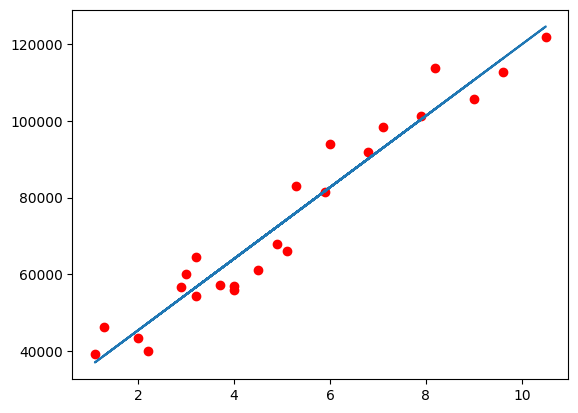

In [37]:
# Visualising with matplotlib
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_pred_train)
plt.show()